In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install fastai
!pip install fastcore
from fastai.vision.all import *

In [3]:
#hide
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *

In [4]:
import torch

In [5]:
print(torch.__version__)

1.10.1+cu102


In [6]:
!pip install torch==1.6.0

  Using cached torch-1.6.0-cp37-cp37m-manylinux1_x86_64.whl (748.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.1
    Uninstalling torch-1.10.1:
      Successfully uninstalled torch-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.2 requires torch==1.10.1, but you have torch 1.6.0 which is incompatible.
fastai 2.5.3 requires torch<1.11,>=1.7.0, but you have torch 1.6.0 which is incompatible.


In [7]:
!pip install torchvision==0.7.0

  Using cached torchvision-0.7.0-cp37-cp37m-manylinux1_x86_64.whl (5.9 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.2
    Uninstalling torchvision-0.11.2:
      Successfully uninstalled torchvision-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.5.3 requires torch<1.11,>=1.7.0, but you have torch 1.6.0 which is incompatible.
fastai 2.5.3 requires torchvision>=0.8.2, but you have torchvision 0.7.0 which is incompatible.


In [8]:
path = untar_data(URLs.MNIST)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [9]:
#hide
Path.BASE_PATH = path

In [10]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [11]:
(path/'training').ls()

(#10) [Path('training/7'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/2'),Path('training/9'),Path('training/0'),Path('training/5'),Path('training/6'),Path('training/3')]

In [12]:
training = path/'training'
training.ls().sorted()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [13]:
testing = path/'testing'
testing.ls().sorted()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [14]:
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
zeros = (path/'training'/'0').ls().sorted()
valid_ones = (path/'testing'/'1').ls().sorted()
valid_twos = (path/'testing'/'2').ls().sorted()
valid_threes = (path/'testing'/'3').ls().sorted()
valid_fours = (path/'testing'/'4').ls().sorted()
valid_fives = (path/'testing'/'5').ls().sorted()
valid_sixes = (path/'testing'/'6').ls().sorted()
valid_sevens = (path/'testing'/'7').ls().sorted()
valid_eights = (path/'testing'/'8').ls().sorted()
valid_nines = (path/'testing'/'9').ls().sorted()
valid_zeros = (path/'testing'/'0').ls().sorted()
ones

(#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...]

In [15]:
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]
zero_tensors = [tensor(Image.open(o)) for o in zeros]
valid_1_tensors = [tensor(Image.open(o)) for o in valid_ones]
valid_2_tensors = [tensor(Image.open(o)) for o in valid_twos]
valid_3_tensors = [tensor(Image.open(o)) for o in valid_threes]
valid_4_tensors = [tensor(Image.open(o)) for o in valid_fours]
valid_5_tensors = [tensor(Image.open(o)) for o in valid_fives]
valid_6_tensors = [tensor(Image.open(o)) for o in valid_sixes]
valid_7_tensors = [tensor(Image.open(o)) for o in valid_sevens]
valid_8_tensors = [tensor(Image.open(o)) for o in valid_eights]
valid_9_tensors = [tensor(Image.open(o)) for o in valid_nines]
valid_0_tensors = [tensor(Image.open(o)) for o in valid_zeros]
len(one_tensors)

6742

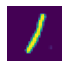

In [16]:
img1=one_tensors[1]
show_image(one_tensors[1]);

In [17]:
#hide
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_zeros = torch.stack(zero_tensors).float()/255
stacked_1_valid = torch.stack(valid_1_tensors).float()/255
stacked_2_valid = torch.stack(valid_2_tensors).float()/255
stacked_3_valid = torch.stack(valid_3_tensors).float()/255
stacked_4_valid = torch.stack(valid_4_tensors).float()/255
stacked_5_valid = torch.stack(valid_5_tensors).float()/255
stacked_6_valid = torch.stack(valid_6_tensors).float()/255
stacked_7_valid = torch.stack(valid_7_tensors).float()/255
stacked_8_valid = torch.stack(valid_8_tensors).float()/255
stacked_9_valid = torch.stack(valid_9_tensors).float()/255
stacked_0_valid = torch.stack(valid_0_tensors).float()/255
stacked_ones

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [18]:
train_x = torch.cat([stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines, stacked_zeros]).view(-1, 28*28)
train_y = tensor([1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines) + [0]*len(zeros)).unsqueeze(1)
train_dset = list(zip(train_x,train_y))

In [19]:
x,y = train_dset[0]
x.shape,y, len(train_dset)

(torch.Size([784]), tensor([1]), 60000)

In [20]:
valid_x = torch.cat([stacked_1_valid, stacked_2_valid, stacked_3_valid, stacked_4_valid, stacked_5_valid, stacked_6_valid, stacked_7_valid, stacked_8_valid, stacked_9_valid, stacked_0_valid]).view(-1, 28*28)
valid_y = tensor([1]*len(stacked_1_valid) + [2]*len(stacked_2_valid) + [3]*len(stacked_3_valid) + [4]*len(stacked_4_valid) + [5]*len(stacked_5_valid) + [6]*len(stacked_6_valid) + [7]*len(stacked_7_valid) + [8]*len(stacked_8_valid) + [9]*len(stacked_9_valid) + [0]*len(stacked_0_valid)).unsqueeze(1)
test_dset = list(zip(valid_x,valid_y))
x,y = test_dset[0]
x.shape,y, len(test_dset)

(torch.Size([784]), tensor([1]), 10000)

In [21]:
train_dl = DataLoader(train_dset, batch_size=256, shuffle=True)
xb,yb = first(train_dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [22]:
test_dl = DataLoader(test_dset, batch_size=256, shuffle=False)
xb,yb = first(test_dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [23]:
dls = DataLoaders(train_dl, test_dl)

In [34]:
s_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)
    )

In [35]:
#loss_function1 = nn.CrossEntropyLoss()
loss_f = CrossEntropyLossFlat()

In [36]:
# check shape of model predictions one a single batch xb
prediction_xb = model(xb)
prediction_xb.shape

torch.Size([256, 10])

In [37]:
#learn = Learner(dls, model, opt_func=SGD, loss_func=loss_f, metrics=accuracy)
#learn = Learner(dls, model,loss_func=loss_function1, metrics=accuracy)
learn = Learner(dls, s_net,loss_func=loss_f, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5)
#learn.fit(40, 0.1)
#learn.fit_one_cycle(1, 0.1)

In [ ]:
learn.export()

In [ ]:
s_net.load_state_dict(torch.load('output/model.pt'))
dummy_input = Variable(torch.randn(1, 1, 28, 28)) 
torch.onnx.export(trained_model, dummy_input, "output/model.onnx") 